## Step 1: Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the IMDB dataset
df = pd.read_csv('imdb_data.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset loaded successfully!
Shape: (5656, 9)
Columns: ['movie_title', 'imdb_score', 'title_year', 'content_rating', 'main_genre', 'director_name', 'star_cast', 'genres', 'duration']


## Step 2: Initial Exploration

In [2]:
# Display basic info
print("=== DATASET INFO ===")
print(df.info())
print("\n=== FIRST 5 ROWS ===")
print(df.head())
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())
print("\n=== DUPLICATE ROWS ===")
print(f"Total duplicate rows: {df.duplicated().sum()}")
print("\n=== DUPLICATE MOVIE TITLES ===")
print(f"Duplicate movie titles: {df.duplicated(subset=['movie_title']).sum()}")
print("\n=== BASIC STATISTICS ===")
print(df.describe())

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     5656 non-null   object 
 1   imdb_score      5656 non-null   float64
 2   title_year      5656 non-null   int64  
 3   content_rating  5656 non-null   object 
 4   main_genre      5656 non-null   object 
 5   director_name   5656 non-null   object 
 6   star_cast       5656 non-null   object 
 7   genres          5656 non-null   object 
 8   duration        5656 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 397.8+ KB
None

=== FIRST 5 ROWS ===
          movie_title  imdb_score  title_year content_rating main_genre  \
0         Superman II         6.8        1980             PG     Action   
1       Heaven's Gate         6.8        1980              R  Adventure   
2   Raise the Titanic         4.7        1980             PG  

## Step 3: Data Cleaning

#### Handle Missing Values

In [3]:
# Check the percentage of missing values for each column
print("=== MISSING VALUES PERCENTAGE ===")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent.sort_values(ascending=False))

# Handle missing values based on column type and importance
print("\n=== HANDLING MISSING VALUES ===")

# For numerical columns - fill with median
numerical_cols = ['imdb_score', 'title_year', 'duration']
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled {col} missing values with median: {median_val}")

# For categorical columns - fill with mode or 'Unknown'
categorical_cols = ['content_rating', 'main_genre', 'director_name', 'star_cast']
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        if col in ['content_rating', 'main_genre']:
            mode_val = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
            df[col] = df[col].fillna(mode_val)
            print(f"Filled {col} missing values with mode: {mode_val}")
        else:
            df[col] = df[col].fillna('Unknown')
            print(f"Filled {col} missing values with 'Unknown'")

# For movie_title - drop rows with missing titles (essential field)
if df['movie_title'].isnull().sum() > 0:
    initial_count = len(df)
    df = df.dropna(subset=['movie_title'])
    print(f"Dropped {initial_count - len(df)} rows with missing movie titles")

print(f"\nMissing values after cleaning: {df.isnull().sum().sum()}")

=== MISSING VALUES PERCENTAGE ===
movie_title       0.0
imdb_score        0.0
title_year        0.0
content_rating    0.0
main_genre        0.0
director_name     0.0
star_cast         0.0
genres            0.0
duration          0.0
dtype: float64

=== HANDLING MISSING VALUES ===

Missing values after cleaning: 0


#### Clean Specific Columns

In [4]:
# Clean movie_title column (remove trailing spaces and special characters)
print("=== CLEANING MOVIE TITLES ===")
df['movie_title'] = df['movie_title'].str.strip()
# Remove special characters that might cause issues but keep the actual title readable
df['movie_title'] = df['movie_title'].str.replace(r'[^\w\s\-\:\.\,\!\?\(\)]', '', regex=True)
print(f"Cleaned movie titles")

# Clean and standardize content_rating
print("\n=== CLEANING CONTENT RATING ===")
print("Original content ratings:")
print(df['content_rating'].value_counts())
# Standardize content ratings
df['content_rating'] = df['content_rating'].str.upper().str.strip()
print("\nStandardized content ratings:")
print(df['content_rating'].value_counts())

# Clean director_name and star_cast
print("\n=== CLEANING DIRECTOR AND CAST ===")
df['director_name'] = df['director_name'].str.strip()
df['star_cast'] = df['star_cast'].str.strip()

# Clean genres column - we'll separate this into individual genre columns later
print("\n=== CLEANING GENRES ===")
df['genres'] = df['genres'].str.strip()
print(f"Sample genres: {df['genres'].head()}")

print("\nColumn cleaning completed!")

=== CLEANING MOVIE TITLES ===
Cleaned movie titles

=== CLEANING CONTENT RATING ===
Original content ratings:
content_rating
R            2314
PG-13        1453
PG           1304
G             262
Not Rated     109
Unrated        43
TV-PG          37
Approved       36
TV-14          36
TV-MA          18
TV-G           18
X               9
TV-Y7           8
NC-17           6
TV-Y            1
TV-Y7-FV        1
Passed          1
Name: count, dtype: int64

Standardized content ratings:
content_rating
R            2314
PG-13        1453
PG           1304
G             262
NOT RATED     109
UNRATED        43
TV-PG          37
APPROVED       36
TV-14          36
TV-MA          18
TV-G           18
X               9
TV-Y7           8
NC-17           6
TV-Y            1
TV-Y7-FV        1
PASSED          1
Name: count, dtype: int64

=== CLEANING DIRECTOR AND CAST ===

=== CLEANING GENRES ===
Sample genres: 0    Action, Adventure, Romance, Sci-Fi
1             Adventure, Drama, Western
2    Acti

#### Handle Duplicates

In [5]:
# Check for duplicate movie titles
print("=== HANDLING DUPLICATES ===")
print(f"Total rows before duplicate removal: {len(df)}")
print(f"Duplicate movie titles: {df.duplicated(subset=['movie_title']).sum()}")

# Show some examples of duplicate titles
duplicates = df[df.duplicated(subset=['movie_title'], keep=False)].sort_values('movie_title')
if len(duplicates) > 0:
    print("\nSample duplicate titles:")
    print(duplicates[['movie_title', 'title_year', 'imdb_score']].head(10))

# Drop duplicates keeping the first occurrence
df = df.drop_duplicates(subset=['movie_title'], keep='first')
print(f"\nRows after duplicate removal: {len(df)}")
print(f"Removed {len(duplicates) - len(df[df.duplicated(subset=['movie_title'], keep=False)])} duplicate rows")

# Check for complete duplicate rows
complete_duplicates = df.duplicated().sum()
if complete_duplicates > 0:
    print(f"\nComplete duplicate rows found: {complete_duplicates}")
    df = df.drop_duplicates()
    print(f"Rows after removing complete duplicates: {len(df)}")
else:
    print("\nNo complete duplicate rows found")

=== HANDLING DUPLICATES ===
Total rows before duplicate removal: 5656
Duplicate movie titles: 412

Sample duplicate titles:
             movie_title  title_year  imdb_score
4860      102 Dalmatians        2000         4.8
1070      102 Dalmatians        2000         4.8
4881  3 Ninjas Kick Back        1994         4.6
449   3 Ninjas Kick Back        1994         4.3
798          A Bugs Life        1998         7.2
5556         A Bugs Life        1998         7.2
2963   A Christmas Carol        2009         6.8
4954   A Christmas Carol        2009         6.8
98     A Christmas Story        1983         8.1
5161   A Christmas Story        1983         7.9

Rows after duplicate removal: 5244
Removed 803 duplicate rows

No complete duplicate rows found


#### Convert Data Types

In [6]:
# Convert data types appropriately
print("=== CONVERTING DATA TYPES ===")

# Ensure imdb_score is numeric
df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')
print(f"imdb_score converted to numeric, null values: {df['imdb_score'].isnull().sum()}")

# Ensure title_year is integer
df['title_year'] = pd.to_numeric(df['title_year'], errors='coerce').astype('Int64')
print(f"title_year converted to integer, null values: {df['title_year'].isnull().sum()}")

# Ensure duration is numeric
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
print(f"duration converted to numeric, null values: {df['duration'].isnull().sum()}")

# Check data types after conversion
print("\n=== DATA TYPES AFTER CONVERSION ===")
print(df.dtypes)

# Check for any remaining null values created during conversion
print("\n=== NULL VALUES AFTER TYPE CONVERSION ===")
print(df.isnull().sum())

# Fill any new null values created during conversion
if df['imdb_score'].isnull().sum() > 0:
    df['imdb_score'] = df['imdb_score'].fillna(df['imdb_score'].median())
if df['title_year'].isnull().sum() > 0:
    df['title_year'] = df['title_year'].fillna(df['title_year'].median())
if df['duration'].isnull().sum() > 0:
    df['duration'] = df['duration'].fillna(df['duration'].median())

print("Data type conversion completed!")

=== CONVERTING DATA TYPES ===
imdb_score converted to numeric, null values: 0
title_year converted to integer, null values: 0
duration converted to numeric, null values: 0

=== DATA TYPES AFTER CONVERSION ===
movie_title        object
imdb_score        float64
title_year          Int64
content_rating     object
main_genre         object
director_name      object
star_cast          object
genres             object
duration          float64
dtype: object

=== NULL VALUES AFTER TYPE CONVERSION ===
movie_title       0
imdb_score        0
title_year        0
content_rating    0
main_genre        0
director_name     0
star_cast         0
genres            0
duration          0
dtype: int64
Data type conversion completed!


#### Create New Features

In [7]:
# Create new features for better analysis
print("=== CREATING NEW FEATURES ===")

# Separate genres into individual columns
print("\nSeparating genres into individual columns...")
# Split genres by comma and strip whitespace
genre_split = df['genres'].str.split(',').apply(lambda x: [genre.strip() for genre in x] if x else [])

# Find the maximum number of genres any movie has
max_genres = max(len(genres) for genres in genre_split)
print(f"Maximum number of genres for any movie: {max_genres}")

# Create individual genre columns
for i in range(max_genres):
    col_name = f"genre_{i+1}"
    df[col_name] = genre_split.apply(lambda x: x[i] if i < len(x) else None)
    print(f"Created {col_name}")

# Create a genre count feature
df['genre_count'] = genre_split.apply(len)
print(f"Created genre_count feature")

# Create decade feature from title_year
df['decade'] = (df['title_year'] // 10) * 10
print(f"Created decade feature")

# Create IMDB score categories
df['imdb_category'] = pd.cut(df['imdb_score'], 
                           bins=[0, 5, 7, 8, 10], 
                           labels=['Poor', 'Average', 'Good', 'Excellent'])
print(f"Created imdb_category feature")

# Create duration categories
df['duration_category'] = pd.cut(df['duration'],
                                bins=[0, 90, 120, 180, float('inf')],
                                labels=['Short', 'Medium', 'Long', 'Very Long'])
print(f"Created duration_category feature")

# Show the first few rows with new features
print("\n=== SAMPLE OF NEW FEATURES ===")
new_feature_cols = ['genre_1', 'genre_2', 'genre_3', 'genre_count', 'decade', 'imdb_category', 'duration_category']
print(df[['movie_title'] + new_feature_cols].head())

# Show genre distribution
print("\n=== GENRE DISTRIBUTION ===")
print("Top 10 first genres:")
print(df['genre_1'].value_counts().head(10))

print("\nFeature creation completed!")

=== CREATING NEW FEATURES ===

Separating genres into individual columns...
Maximum number of genres for any movie: 8
Created genre_1
Created genre_2
Created genre_3
Created genre_4
Created genre_5
Created genre_6
Created genre_7
Created genre_8
Created genre_count feature
Created decade feature
Created imdb_category feature
Created duration_category feature

=== SAMPLE OF NEW FEATURES ===
          movie_title    genre_1    genre_2  genre_3  genre_count  decade  \
0         Superman II     Action  Adventure  Romance            4    1980   
1        Heavens Gate  Adventure      Drama  Western            3    1980   
2   Raise the Titanic     Action  Adventure    Drama            4    1980   
3        Flash Gordon     Action  Adventure   Sci-Fi            3    1980   
4  Lion of the Desert  Biography      Drama  History            4    1980   

  imdb_category duration_category  
0       Average            Medium  
1       Average              Long  
2          Poor            Medium  


## Step 4: Outlier Detection and Handling

=== OUTLIER DETECTION AND HANDLING ===


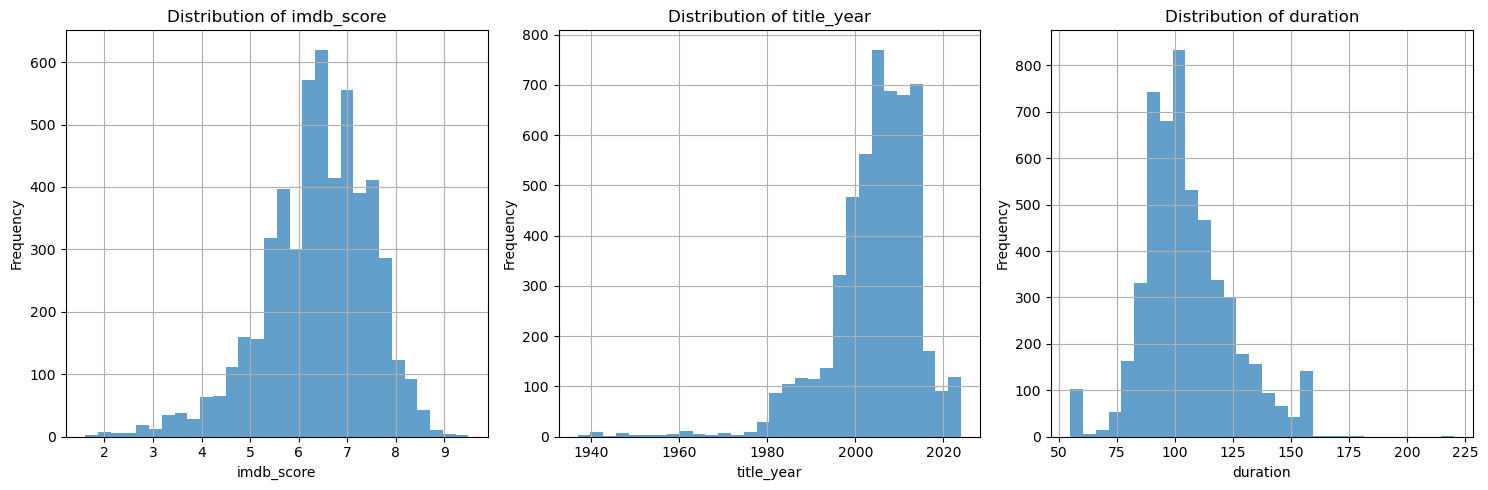

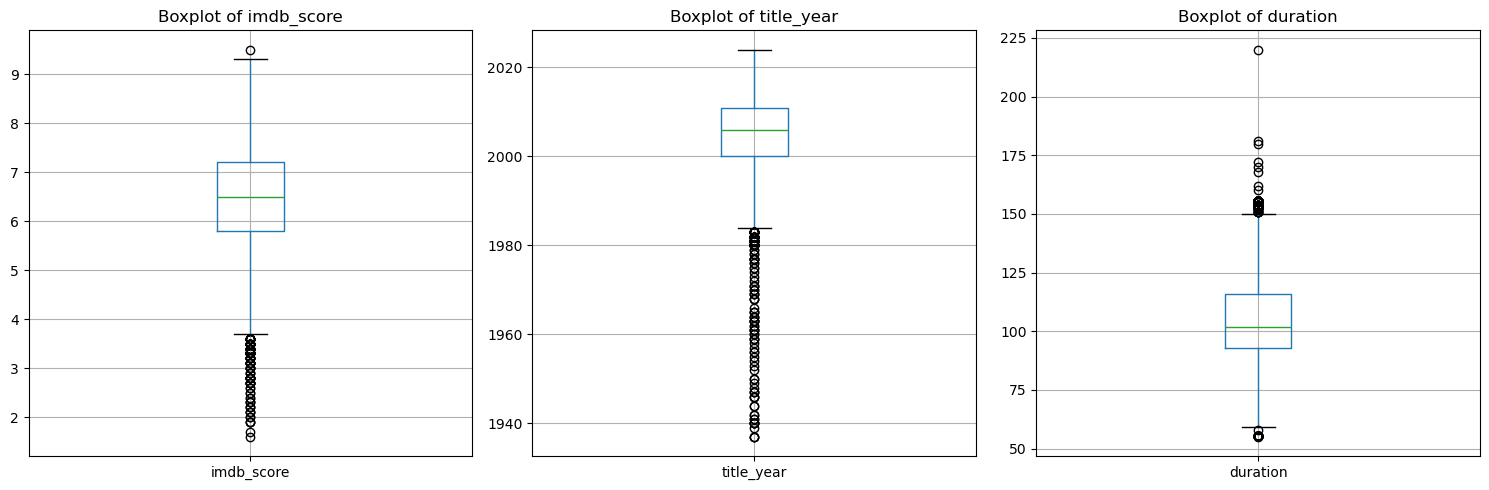


=== OUTLIER STATISTICS ===
imdb_score:
  Outliers: 117 (2.23%)
  Lower bound: 3.70
  Upper bound: 9.30
  Min value: 1.60
  Max value: 9.50

title_year:
  Outliers: 195 (3.72%)
  Lower bound: 1983.50
  Upper bound: 2027.50
  Min value: 1937.00
  Max value: 2024.00

duration:
  Outliers: 250 (4.77%)
  Lower bound: 58.50
  Upper bound: 150.50
  Min value: 55.00
  Max value: 220.00

=== HANDLING OUTLIERS ===
Capped 250 duration outliers
Note: IMDB score and year outliers were kept as they represent valid extreme values

Outlier handling completed!


In [8]:
# Visualize numerical columns for outliers
print("=== OUTLIER DETECTION AND HANDLING ===")

# Check the distribution of numerical columns
numerical_cols = ['imdb_score', 'title_year', 'duration']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    df[col].hist(ax=axes[i], bins=30, alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create boxplots to visualize outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Identify outliers using IQR method
print("\n=== OUTLIER STATISTICS ===")
outlier_info = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_info[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"{col}:")
    print(f"  Outliers: {len(outliers)} ({(len(outliers)/len(df)*100):.2f}%)")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")
    print(f"  Min value: {df[col].min():.2f}")
    print(f"  Max value: {df[col].max():.2f}")
    print()

# Handle outliers for duration only (as IMDB score and year shouldn't be capped)
print("=== HANDLING OUTLIERS ===")
duration_outliers_before = len(df[(df['duration'] < outlier_info['duration']['lower_bound']) | 
                                 (df['duration'] > outlier_info['duration']['upper_bound'])])

# Cap duration outliers
df['duration'] = np.where(df['duration'] < outlier_info['duration']['lower_bound'], 
                         outlier_info['duration']['lower_bound'], df['duration'])
df['duration'] = np.where(df['duration'] > outlier_info['duration']['upper_bound'], 
                         outlier_info['duration']['upper_bound'], df['duration'])

print(f"Capped {duration_outliers_before} duration outliers")
print("Note: IMDB score and year outliers were kept as they represent valid extreme values")

print("\nOutlier handling completed!")

## Step 5: Final Checks and Save Clean Data

In [9]:
# Final data quality checks and summary
print("=== FINAL DATA QUALITY CHECKS ===")

# Check cleaned data info
print("Dataset info after cleaning:")
print(df.info())

# Check for any remaining missing values
print(f"\nMissing values after cleaning: {df.isnull().sum().sum()}")
if df.isnull().sum().sum() > 0:
    print("Missing values by column:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

# Summary statistics
print("\n=== SUMMARY STATISTICS ===")
print(df.describe())

# Show sample of cleaned data
print("\n=== SAMPLE OF CLEANED DATA ===")
print(df.head())

# Data quality metrics
print("\n=== DATA QUALITY METRICS ===")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Movies per decade:")
print(df['decade'].value_counts().sort_index())

print(f"\nContent rating distribution:")
print(df['content_rating'].value_counts())

print(f"\nTop 10 genres:")
print(df['genre_1'].value_counts().head(10))

print(f"\nIMDB score distribution:")
print(df['imdb_category'].value_counts())

# Save cleaned data
output_filename = 'cleaned_imdb_data.csv'
df.to_csv(output_filename, index=False)
print(f"\n=== DATA SAVED ===")
print(f"Cleaned data saved to: {output_filename}")
print(f"Shape of saved data: {df.shape}")

# Show final column list
print(f"\nFinal columns in cleaned dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n✅ Data cleaning completed successfully!")

=== FINAL DATA QUALITY CHECKS ===
Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 5244 entries, 0 to 5655
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   movie_title        5244 non-null   object  
 1   imdb_score         5244 non-null   float64 
 2   title_year         5244 non-null   Int64   
 3   content_rating     5244 non-null   object  
 4   main_genre         5244 non-null   object  
 5   director_name      5244 non-null   object  
 6   star_cast          5244 non-null   object  
 7   genres             5244 non-null   object  
 8   duration           5244 non-null   float64 
 9   genre_1            5244 non-null   object  
 10  genre_2            4656 non-null   object  
 11  genre_3            3339 non-null   object  
 12  genre_4            1328 non-null   object  
 13  genre_5            421 non-null    object  
 14  genre_6            95 non-null     object  
 1

In [10]:
# Display final dataset structure and data dictionary
print("=== FINAL DATASET STRUCTURE ===")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== DATA DICTIONARY ===")
data_dict = {
    'movie_title': 'Movie title (cleaned)',
    'imdb_score': 'IMDB rating score (0-10)',
    'title_year': 'Year the movie was released',
    'content_rating': 'Content rating (G, PG, PG-13, R, etc.)',
    'main_genre': 'Primary genre of the movie',
    'director_name': 'Director name',
    'star_cast': 'Main cast members',
    'genres': 'Original genres string (comma-separated)',
    'duration': 'Movie duration in minutes',
    'genre_1': 'First genre',
    'genre_2': 'Second genre (if applicable)',
    'genre_3': 'Third genre (if applicable)',
    'genre_count': 'Number of genres assigned to the movie',
    'decade': 'Decade the movie was released',
    'imdb_category': 'IMDB score category (Poor/Average/Good/Excellent)',
    'duration_category': 'Duration category (Short/Medium/Long/Very Long)'
}

for col in df.columns:
    if col in data_dict:
        print(f"{col:18} - {data_dict[col]}")
    else:
        # For dynamically created genre columns
        if col.startswith('genre_') and col != 'genre_count':
            print(f"{col:18} - {col.replace('_', ' ').title()}")

print("\n=== READY FOR NEXT STEPS ===")
print("✅ Data preprocessing completed")
print("✅ Duplicates removed")
print("✅ Missing values handled")
print("✅ Genres separated into individual columns")
print("✅ New features created")
print("✅ Outliers handled")
print("✅ Data types standardized")
print("\nThe cleaned dataset is now ready for feature engineering and modeling!")

=== FINAL DATASET STRUCTURE ===
Dataset shape: (5244, 21)
Memory usage: 3.52 MB

=== DATA DICTIONARY ===
movie_title        - Movie title (cleaned)
imdb_score         - IMDB rating score (0-10)
title_year         - Year the movie was released
content_rating     - Content rating (G, PG, PG-13, R, etc.)
main_genre         - Primary genre of the movie
director_name      - Director name
star_cast          - Main cast members
genres             - Original genres string (comma-separated)
duration           - Movie duration in minutes
genre_1            - First genre
genre_2            - Second genre (if applicable)
genre_3            - Third genre (if applicable)
genre_4            - Genre 4
genre_5            - Genre 5
genre_6            - Genre 6
genre_7            - Genre 7
genre_8            - Genre 8
genre_count        - Number of genres assigned to the movie
decade             - Decade the movie was released
imdb_category      - IMDB score category (Poor/Average/Good/Excellent)
duratio